Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Collecting the Data

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Grades.csv")

EDA (Non-Graphical)

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.shape

(571, 43)

The Dataset contains 571 rows and 43 columns

In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

There are a few null values in most of the columns and the data type of many columns needs to be changed to float so that the model can predict the data corectly

<Figure size 3000x2800 with 0 Axes>

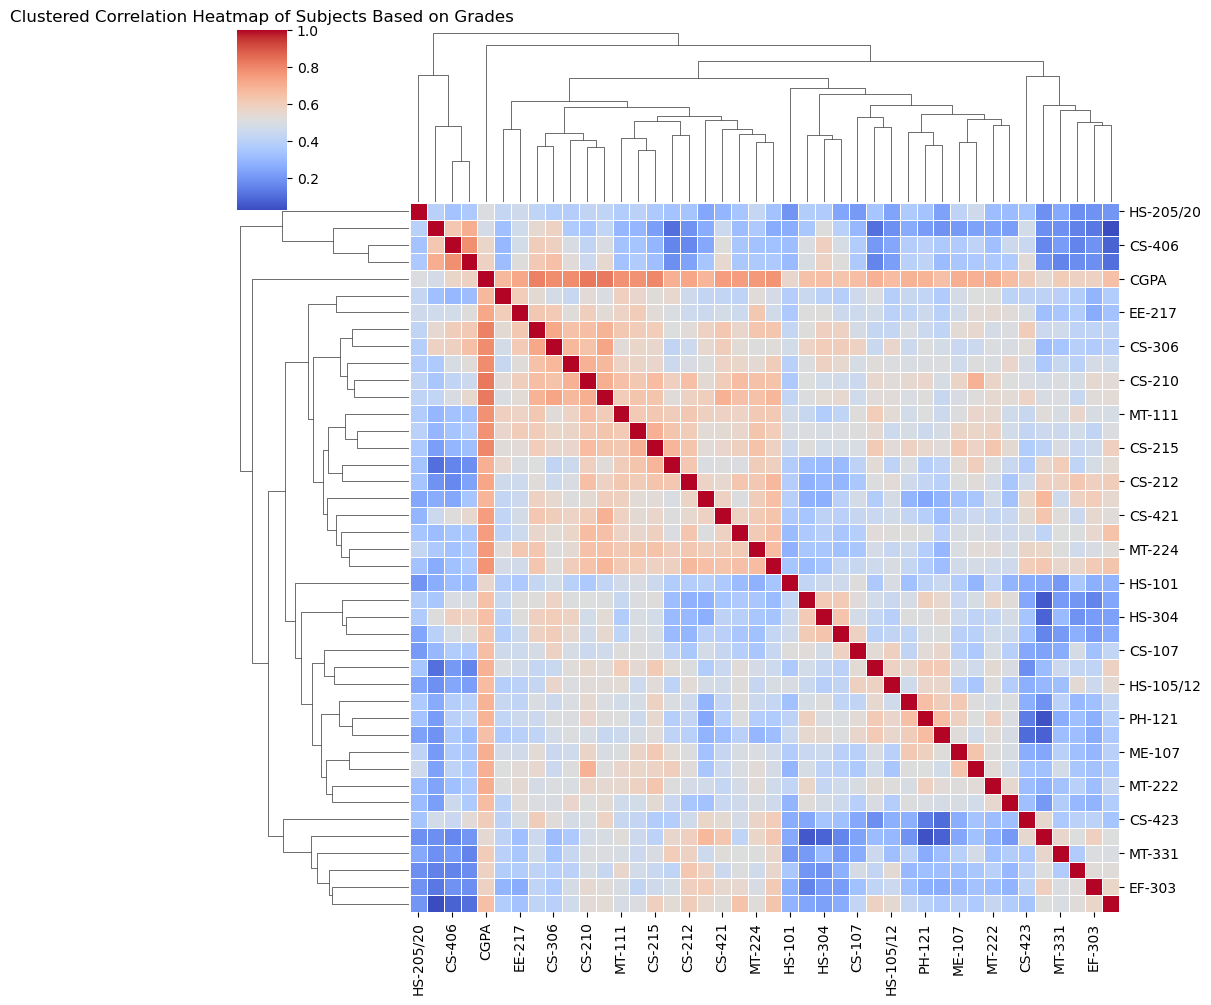

In [9]:
# Creating a hierarchical correlation matrix 
# Since we have a lot of features creating a hierarchical correlation matrix is important
grade_col = df.columns[1:]
grade_mapping = {'A+':5,'A':4.5,'A-':4,'B+':3.75,'B':3.5,'B-':3,'C+':2.5,'C':2.25,'C-':2,'D+':1.75,'D':1.5,'D-':1.25,'F':0,'W':0,'I':0,'WU':0}
df[grade_col] = df[grade_col].replace(grade_mapping)
corr_mat = df[grade_col].corr()
plt.figure(figsize=(30,28))
sns.clustermap(corr_mat,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Clustered Correlation Heatmap of Subjects Based on Grades')
plt.show()

In [10]:
#Changing the data type of features to float
for column in df.columns:
    if column != 'Seat No.' and column !='CGPA':
        df[column] = df[column].astype(float)
        
print(df.dtypes)

Seat No.      object
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object


In [11]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [12]:
# Replacing the null values to mean values
df = df.replace('NaN',np.nan)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
missing_values = df.isnull().sum()
print('Remaining missing values:')
print(missing_values)

Remaining missing values:
Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64


In [13]:
# Using value counts to count the instances in each feature
grade = df.columns[1:-1]
grade_count = {subject: df[subject].value_counts() for subject in grade}
for subject, counts in grade_count.items():
    print(f"Subject: {subject}")
    print(counts)
    print("\n")

Subject: PH-121
PH-121
4.00    112
4.50    111
3.75     61
3.50     57
3.00     56
1.50     44
2.25     33
2.50     31
1.75     22
5.00     22
2.00     19
0.00      3
Name: count, dtype: int64


Subject: HS-101
HS-101
4.00    82
3.00    78
2.25    68
3.50    63
3.75    59
2.00    50
2.50    47
1.50    45
4.50    38
1.75    36
5.00     4
0.00     1
Name: count, dtype: int64


Subject: CY-105
CY-105
4.500000    177
4.000000    120
3.750000     50
3.500000     49
3.000000     42
1.500000     31
5.000000     31
2.250000     19
2.500000     17
2.000000     16
1.750000     14
0.000000      4
3.692544      1
Name: count, dtype: int64


Subject: HS-105/12
HS-105/12
4.500000    96
4.000000    75
3.750000    70
3.500000    57
1.500000    45
2.250000    41
3.000000    40
2.500000    39
2.000000    36
1.750000    34
5.000000    34
0.000000     3
3.285526     1
Name: count, dtype: int64


Subject: MT-111
MT-111
4.000000    105
4.500000    100
3.000000     70
3.750000     62
3.500000     55
2.000000

EDA (Graphical)

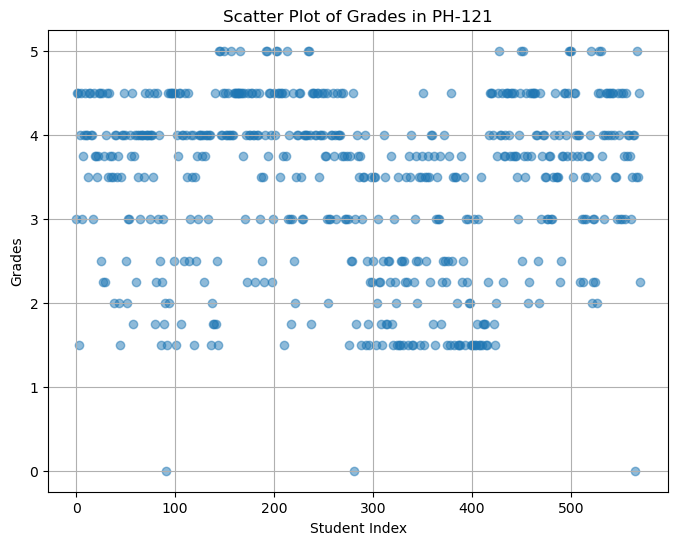

In [14]:
subject = 'PH-121'
grades = df[subject]
plt.figure(figsize=(8,6))
plt.scatter(range(len(grades)), grades, alpha = 0.5)
plt.title(f"Scatter Plot of Grades in {subject}")
plt.xlabel('Student Index')
plt.ylabel('Grades')
plt.grid(True)

plt.show()

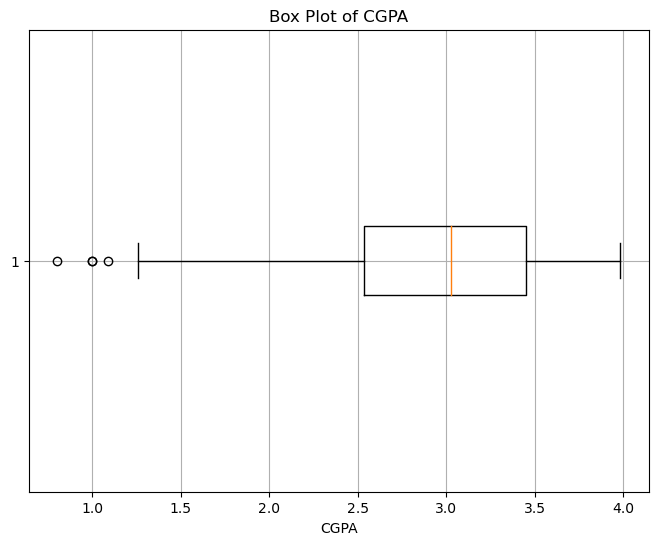

In [15]:
var = 'CGPA'
plt.figure(figsize=(8,6))
plt.boxplot(df[var], vert=False)
plt.title(f"Box Plot of {var}")
plt.xlabel('CGPA')
plt.grid(True)
plt.show()

Creating a Logistic Regression Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
x = df.drop(columns=['CGPA','Seat No.'])
y = df['CGPA']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2 Score: {r2:.2f})")

Mean Squared Error: 0.01
R-squared (R2 Score: 0.96)


Mean Squared Error (MSE): This is a measure of the average squared difference between the actual (observed) values and the predicted values by the regression model. It is a measure of how well the model's predictions match the actual data. Lower MSE values indicate better model performance. In this case, an MSE of 0.01 indicates that, on average, the squared difference between the model's predictions and the actual values is quite small.

R-squared (R2) Score: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model. It is a value between 0 and 1, where:

R2 = 0 means that the model does not explain any of the variance in the target variable.
R2 = 1 means that the model perfectly explains all of the variance in the target variable.
In this case, an R2 score of 0.96 means that approximately 96% of the variance in the target variable is explained by the independent variables in your linear regression model. This is a very high R2 score, indicating that your model is performing well and is able to capture most of the variation in the target variable.